# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data

print(transactions.shape)


(1000000, 10)


In [4]:
# missing data
missing = transactions.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


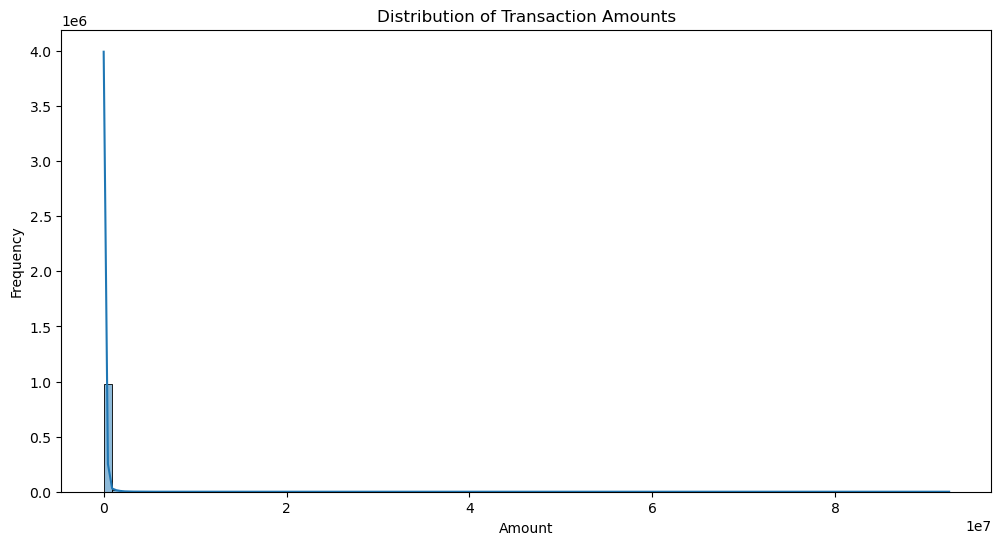

In [5]:
# Distribution of Transaction Amounts
plt.figure(figsize=(12, 6))
sns.histplot(transactions['amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

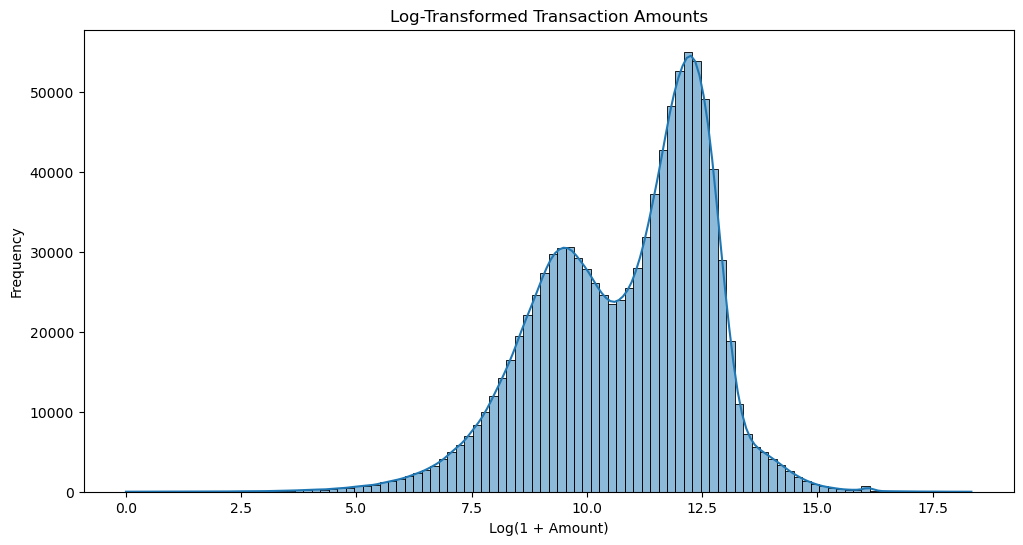

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(transactions['amount']), bins=100, kde=True)
plt.title("Log-Transformed Transaction Amounts")
plt.xlabel("Log(1 + Amount)")
plt.ylabel("Frequency")
plt.show()

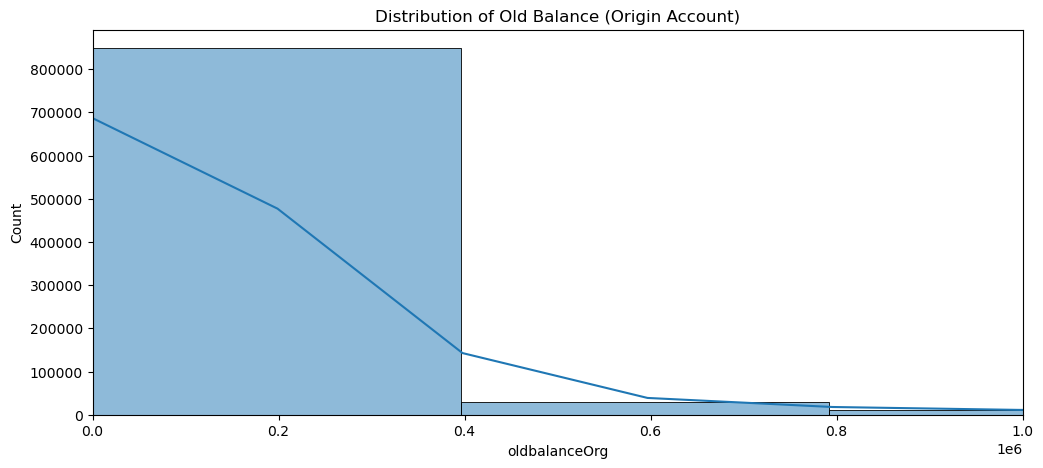

In [7]:
# Old Balance

plt.figure(figsize=(12, 5))
sns.histplot(transactions['oldbalanceOrg'], bins=100, kde=True)
plt.title("Distribution of Old Balance (Origin Account)")
plt.xlabel("oldbalanceOrg")
plt.xlim(0, 1e6)
plt.show()

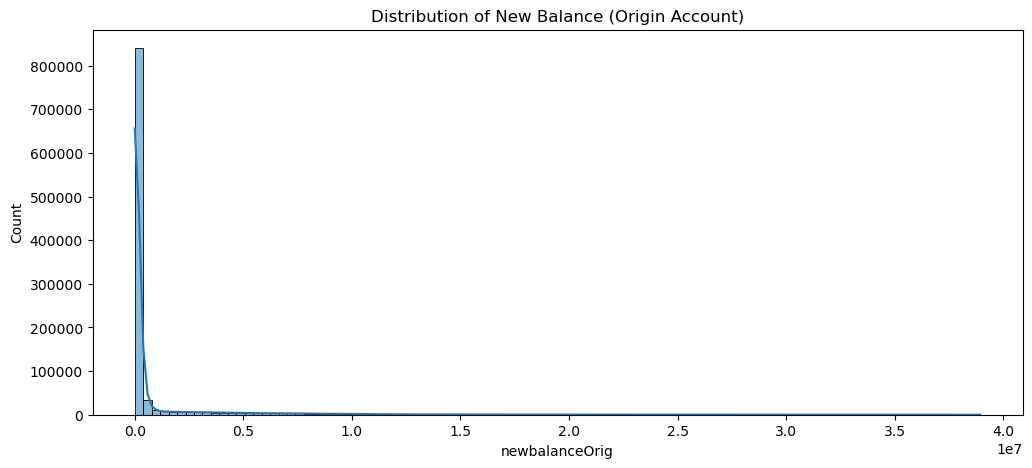

In [8]:
# New balance 
plt.figure(figsize=(12, 5))
sns.histplot(transactions['newbalanceOrig'], bins=100, kde=True)
plt.title("Distribution of New Balance (Origin Account)")
plt.xlabel("newbalanceOrig")
plt.show()

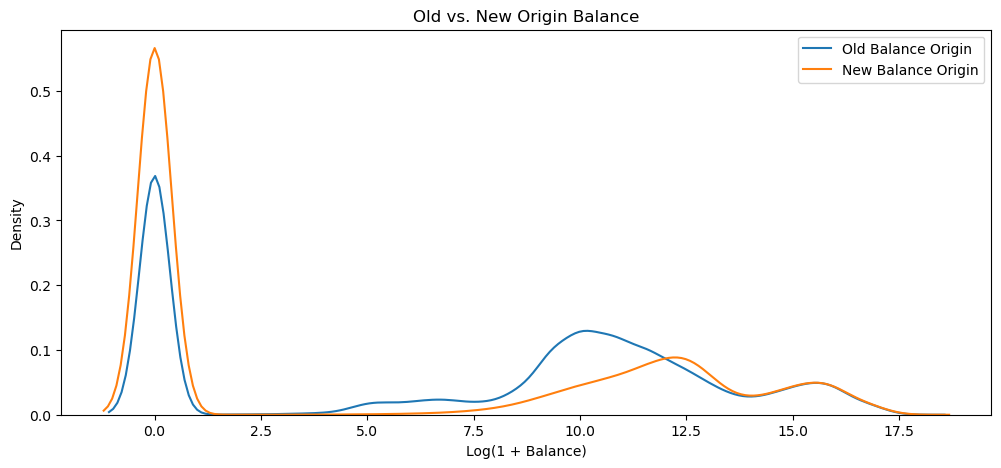

In [9]:
# Old vs. New Original Balance

plt.figure(figsize=(12, 5))
sns.kdeplot(np.log1p(transactions['oldbalanceOrg']), label='Old Balance Origin')
sns.kdeplot(np.log1p(transactions['newbalanceOrig']), label='New Balance Origin')
plt.title("Old vs. New Origin Balance")
plt.xlabel("Log(1 + Balance)")
plt.legend()
plt.show()

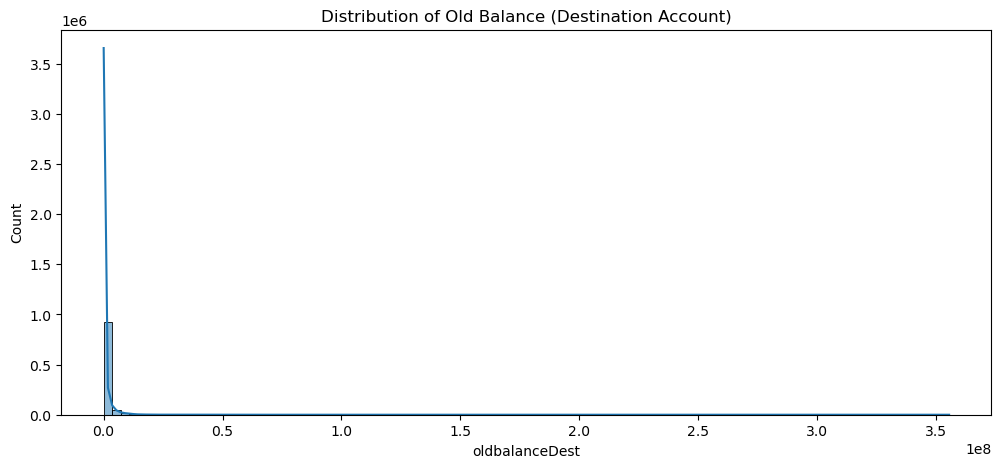

In [10]:
# Old balance Destination


plt.figure(figsize=(12, 5))
sns.histplot(transactions['oldbalanceDest'], bins=100, kde=True)
plt.title("Distribution of Old Balance (Destination Account)")
plt.xlabel("oldbalanceDest")
plt.show()

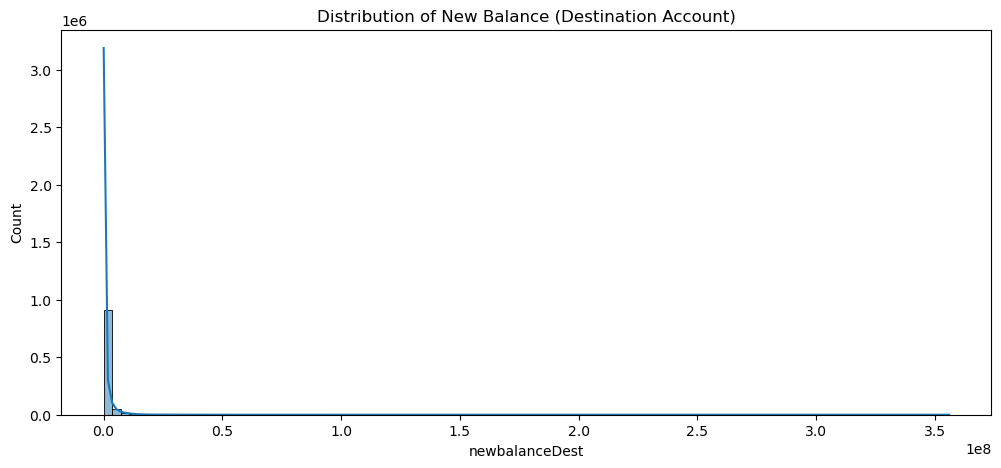

In [11]:
# New balance destination

plt.figure(figsize=(12, 5))
sns.histplot(transactions['newbalanceDest'], bins=100, kde=True)
plt.title("Distribution of New Balance (Destination Account)")
plt.xlabel("newbalanceDest")
plt.show()


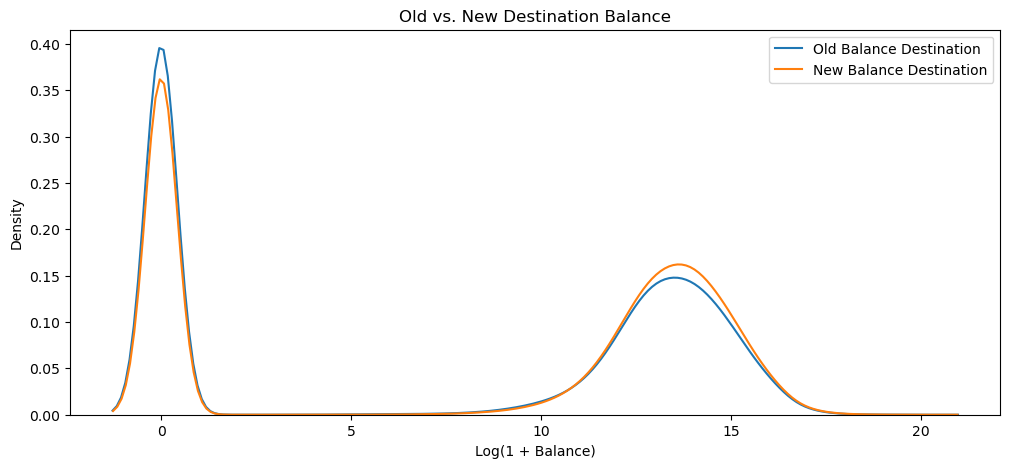

In [12]:
# Old vs. New Destination Balance

plt.figure(figsize=(12, 5))
sns.kdeplot(np.log1p(transactions['oldbalanceDest']), label='Old Balance Destination')
sns.kdeplot(np.log1p(transactions['newbalanceDest']), label='New Balance Destination')
plt.title("Old vs. New Destination Balance")
plt.xlabel("Log(1 + Balance)")
plt.legend()
plt.show()

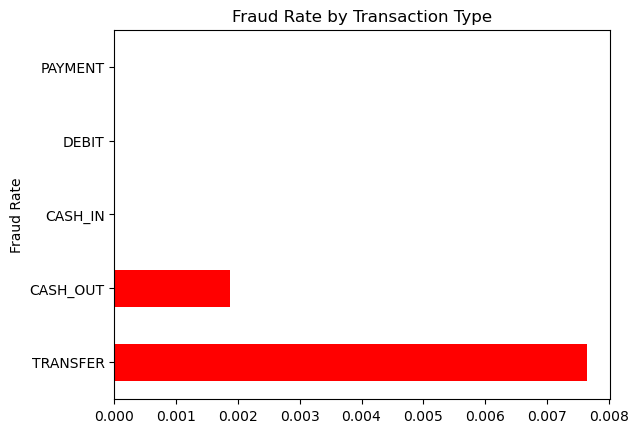

In [13]:
# Fraud rate by transaction type
fraud_by_type = transactions.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='barh', color='red')
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Rate")
plt.show()

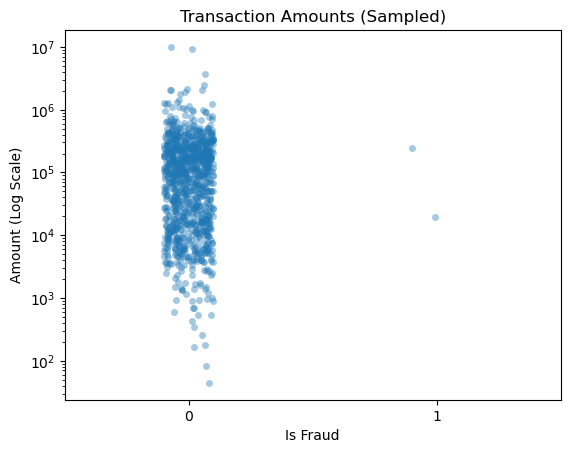

In [14]:
# Compare fraud and non-fraud transaction amounts
sns.stripplot(data=transactions.sample(1000), x='isFraud', y='amount', jitter=True, alpha=0.4)
plt.yscale('log')  # Log scale to handle outliers
plt.title('Transaction Amounts (Sampled)')
plt.xlabel('Is Fraud')
plt.ylabel('Amount (Log Scale)')
plt.show()

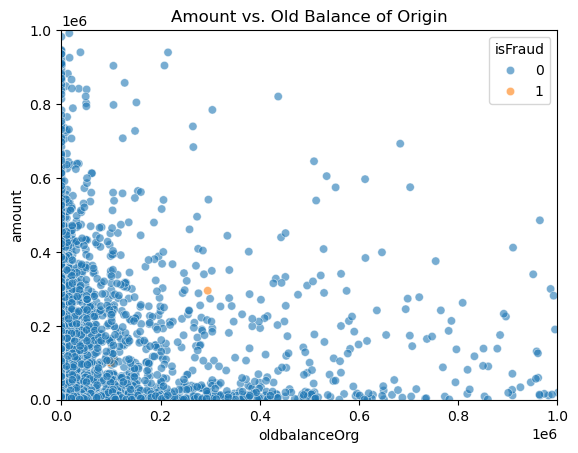

In [15]:
# amount vs. oldbalanceOrg

sns.scatterplot(data=transactions.sample(5000), 
                x='oldbalanceOrg', y='amount', 
                hue='isFraud', alpha=0.6)
plt.title("Amount vs. Old Balance of Origin")
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()

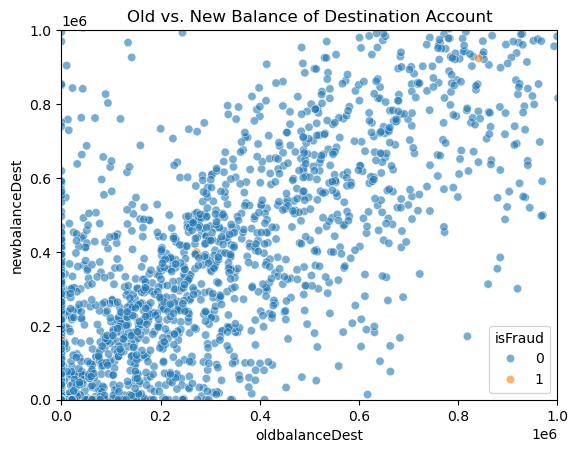

In [16]:
#oldbalanceDest vs. newbalanceDest
sns.scatterplot(data=transactions.sample(5000), 
                x='oldbalanceDest', y='newbalanceDest', 
                hue='isFraud', alpha=0.6)
plt.title("Old vs. New Balance of Destination Account")
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()

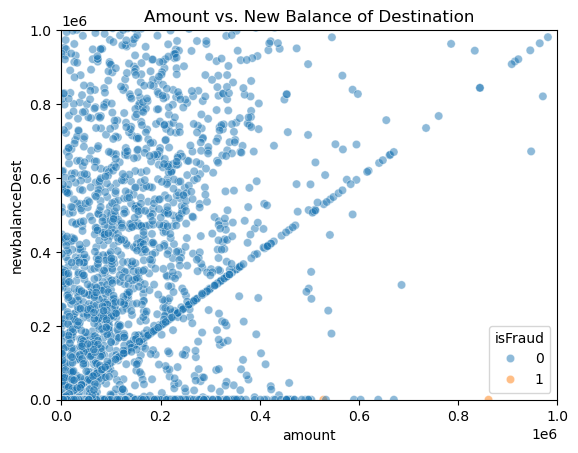

In [17]:
#Amount vs. New Balance of Destination

sns.scatterplot(data=transactions.sample(5000), 
                x='amount', y='newbalanceDest', 
                hue='isFraud', alpha=0.5)
plt.title("Amount vs. New Balance of Destination")
plt.xlim(0, 1e6)
plt.ylim(0, 1e6)
plt.show()

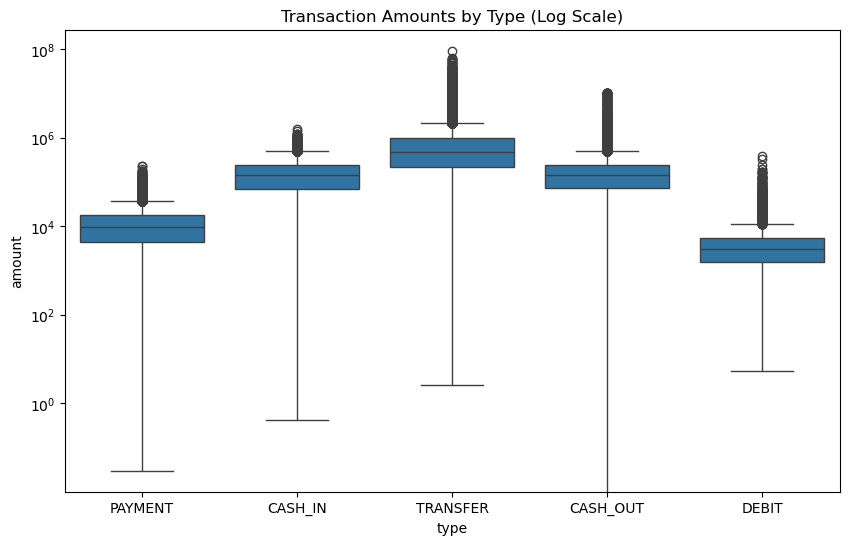

In [18]:
# Transaction type

plt.figure(figsize=(10, 6))
sns.boxplot(data=transactions, x='type', y='amount')
plt.yscale('log')  
plt.title("Transaction Amounts by Type (Log Scale)")
plt.show()

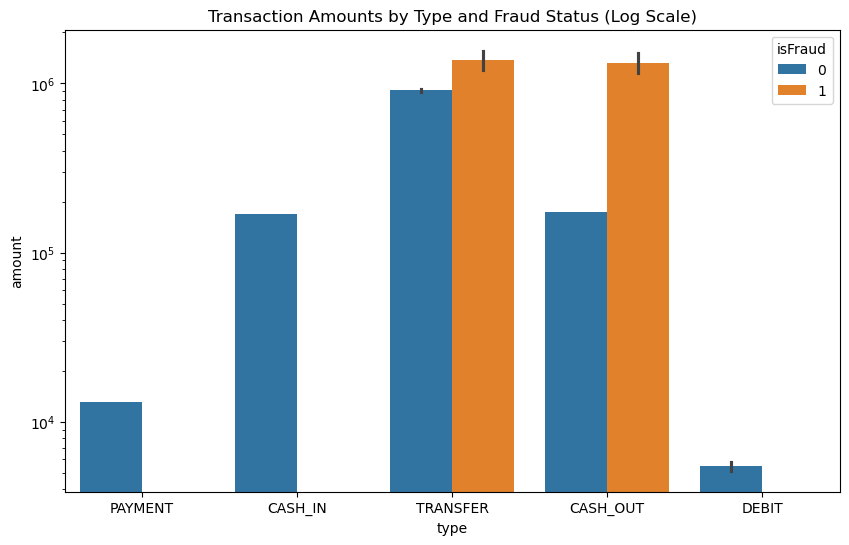

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=transactions, x='type', y='amount', hue='isFraud')
plt.yscale('log') 
plt.title("Transaction Amounts by Type and Fraud Status (Log Scale)")
plt.show()

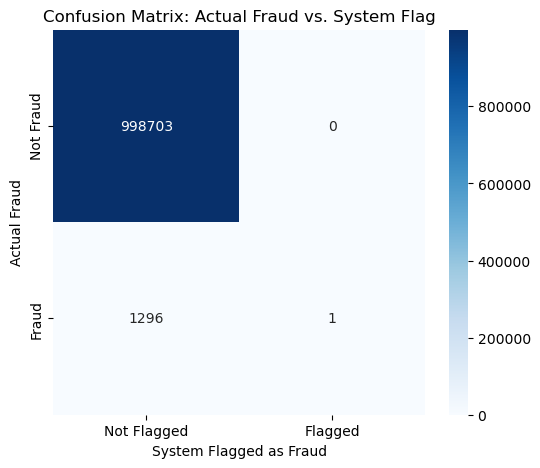

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(transactions['isFraud'], transactions['isFlaggedFraud'])

# Labels for clarity
labels = ['Not Flagged', 'Flagged']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=['Not Fraud', 'Fraud'])

plt.title("Confusion Matrix: Actual Fraud vs. System Flag")
plt.xlabel("System Flagged as Fraud")
plt.ylabel("Actual Fraud")
plt.show()

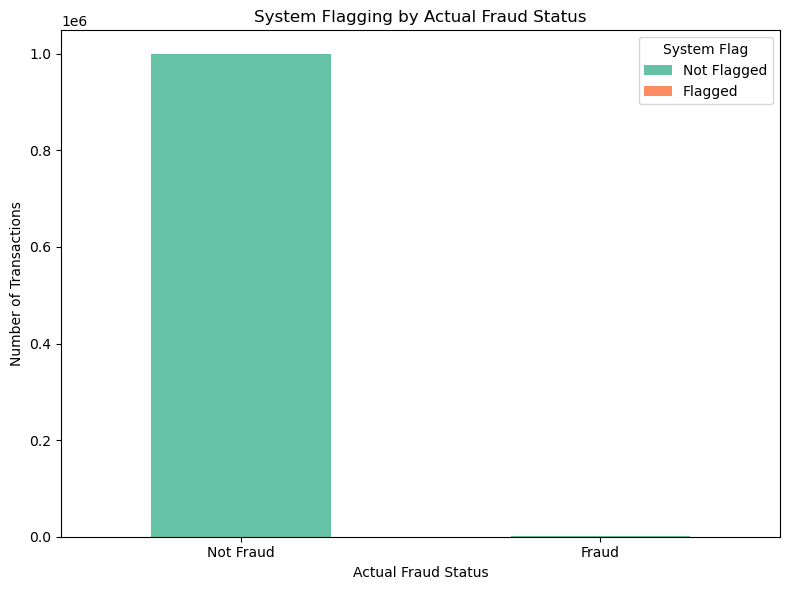

In [23]:
stacked_data = transactions.groupby(['isFraud', 'isFlaggedFraud']).size().unstack().fillna(0)
stacked_data.columns = ['Not Flagged', 'Flagged']
stacked_data.index = ['Not Fraud', 'Fraud']

# Plot
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#66c2a5', '#fc8d62'])

plt.title("System Flagging by Actual Fraud Status")
plt.ylabel("Number of Transactions")
plt.xlabel("Actual Fraud Status")
plt.legend(title="System Flag")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

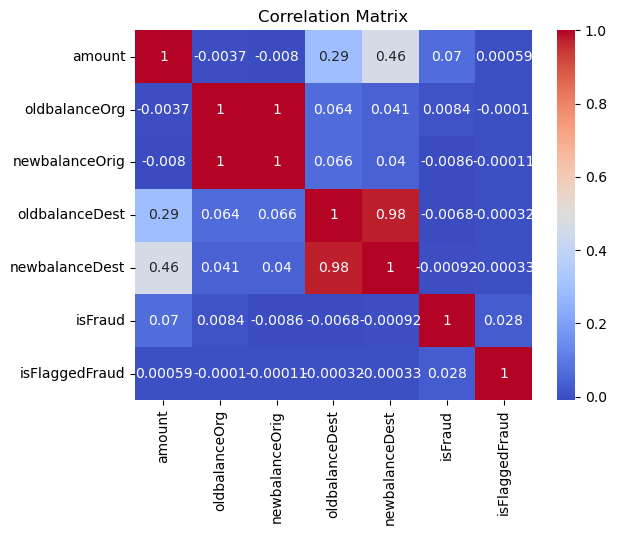

In [25]:
corr_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
sns.heatmap(transactions[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Most transactions are small, and have low balances. In some rare occasion large transactions tend to be suspicious or abnormal and might warrant deeper inspection.
Zero balances before or after transactions (in oldbalanceOrg or oldbalanceDest) may be compromised accounts.
In oldbalanceOrg / newbalanceOrig accounts have either zero or relatively low balances before and after transactions.
The distribution of numeric features confirms that fraud is a rare event.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Fraudulent transactions seem to cluster where amount = oldbalanceOrg.  It seems when fraud happens the entire balance of the origin account is drained, especially in TRANSFER and CASH_OUT transactions. Fradulent transaction concetrate in specific regions of the numeric feature space. 

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.


Yes some transaction types show differences in typical amounts. For example, PAYMENT transactions tend to be small and routine, while TRANSFER and CASH_OUT transactions are larger. Also, higher transaction are more closely associated with fraud.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Fraud happens in TRANSFER and CASH_OUT types. Fraud is rare in PAYMENT, CASH_IN, and DEBIT, which also has lower transaction amounts overall.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

It seems fraud goes undetected. current fraud detection flag is ineffective at capturing actual fraud. As per visualization 99% or more Not Flagged  and 1% or less Flagged. 